Notebook Purpose:

- Verify CoinAPI test key
- Connect to [CoinAPI](https://www.coinapi.io/)
- Create sample query to CoinAPI as proof of concept
- Visualize sample query results
- Determine how best to move forward -> [Dash/Plotly](https://plotly.com/dash/)


Next:

- Generate queries, store historical data, determine how new data will be retrieved/stored
- Data Cleaning
- Feature Engineering
- Time Series model(s) selection
- Determine how to proceed with Tweetscraping/NLP (Sentiment Analysis) to be used in predictive modeling for BTC -> Plumb limitations of [Tweepy](http://docs.tweepy.org/en/latest/), [Twitterscraper](https://github.com/taspinar/twitterscraper)
- Modeling
- Hosting


Sample Notification:
 
- implement logic for proof of concept
    ex: if change in BTC.price exceeds 'X' over a period of 'Y' -> Do 'Z'
    - likely ping a user on Slack, Discord, or other messaging service

In [1]:
import coinapi_rest_v1
import datetime, sys
import os, re
from dotenv import load_dotenv
load_dotenv()
from coinapi_rest_v1 import CoinAPIv1

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
test_key = os.getenv('API_KEY')
api = CoinAPIv1(test_key)

In [3]:
# Verify API Connection:
exchange_rate = api.exchange_rates_get_specific_rate('BTC', 'USD')
print('Time: %s' % exchange_rate['time'])
print('Base: %s' % exchange_rate['asset_id_base'])
print('Quote: %s' % exchange_rate['asset_id_quote'])
print('Rate: %s' % exchange_rate['rate'])

Time: 2020-05-29T16:28:10.1651683Z
Base: BTC
Quote: USD
Rate: 9428.256908311876


In [4]:
import time
import datetime

In [5]:
# Create TimeDelta variable and subtract period from current date:
today = datetime.date.today()
trailing_two_weeks = datetime.timedelta(weeks=2)
before = today - trailing_two_weeks

In [6]:
# Display DateRange for sample query:
today, before

(datetime.date(2020, 5, 29), datetime.date(2020, 5, 15))

In [7]:
# Generate Query using time delta period specified above:
ohlcv_trailing_two = api.ohlcv_historical_data('BITSTAMP_SPOT_BTC_USD', \
                        {'period_id': '1HRS', \
                         'time_start': before, \
                         'limit':1000})

In [8]:
# Store Query results in DataFrame:
df_trailing_two = pd.DataFrame(data=ohlcv_trailing_two)

In [9]:
len(df_trailing_two)

353

In [10]:
df_trailing_two.head()

,time_period_start,time_period_end,time_open,time_close,price_open,price_high,price_low,price_close,volume_traded,trades_count
0,2020-05-15T00:00:00.0000000Z,2020-05-15T01:00:00.0000000Z,2020-05-15T00:00:36.3090000Z,2020-05-15T00:59:50.7100000Z,9809.91,9844.66,9714.14,9767.57,535.932408,1465
1,2020-05-15T01:00:00.0000000Z,2020-05-15T02:00:00.0000000Z,2020-05-15T01:00:00.9160000Z,2020-05-15T01:59:52.4340000Z,9776.03,9776.03,9723.04,9744.86,146.446724,698
2,2020-05-15T02:00:00.0000000Z,2020-05-15T03:00:00.0000000Z,2020-05-15T02:00:01.8740000Z,2020-05-15T02:59:56.9930000Z,9741.87,9744.12,9215.65,9495.03,2800.924914,4482
3,2020-05-15T03:00:00.0000000Z,2020-05-15T04:00:00.0000000Z,2020-05-15T03:00:01.2750000Z,2020-05-15T03:59:59.5200000Z,9490.97,9560.21,9433.33,9475.26,493.929159,1422
4,2020-05-15T04:00:00.0000000Z,2020-05-15T05:00:00.0000000Z,2020-05-15T04:00:01.3850000Z,2020-05-15T04:59:59.3690000Z,9475.26,9508.06,9430.00,9442.71,312.422173,1179


In [11]:
sns.set_palette('Set2')

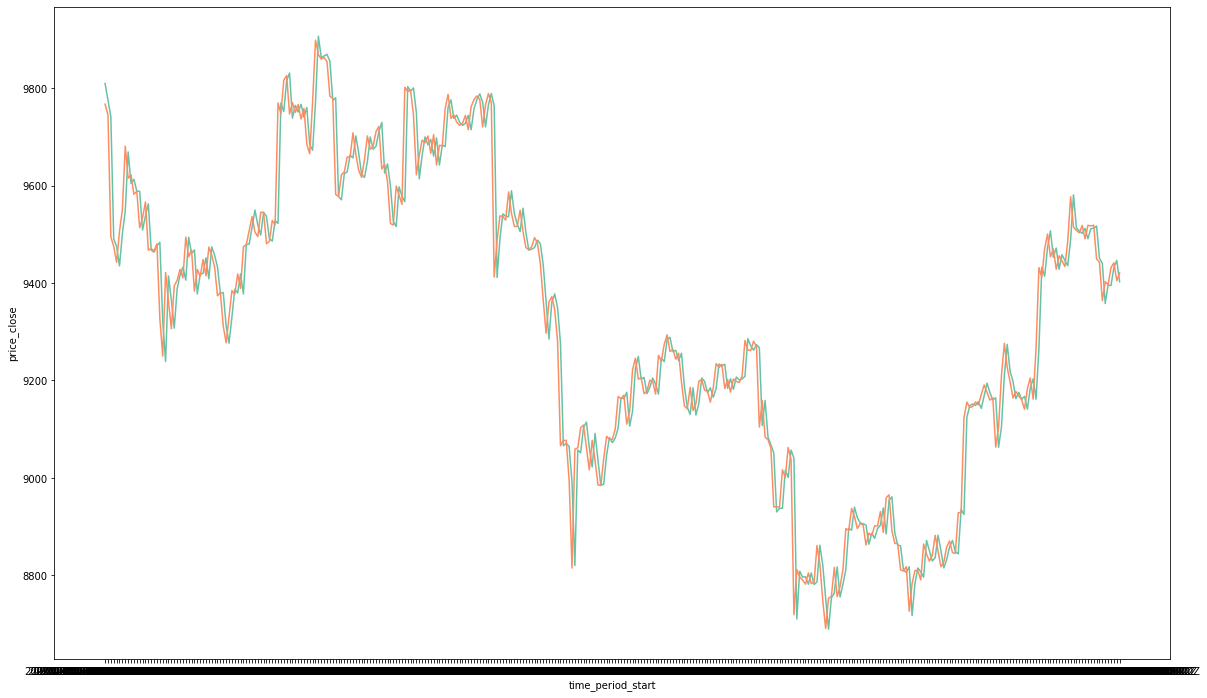

In [12]:
# Sample Visualization:
fig = plt.figure(figsize=(20, 12))

ax = sns.lineplot(data=df_trailing_two, x=df_trailing_two.time_period_start, 
                  y=df_trailing_two.price_open)
ax = sns.lineplot(data=df_trailing_two, x=df_trailing_two.time_period_start, 
                  y=df_trailing_two.price_close)
                  
plt.show();

Next, let's briefly test twitterscraper. Eventually, relevant tweets will be collected, and given a sentiment score. Ideally, sentiment analysis of tweets will serve as a feature in our predictive analytics model. 

In [13]:
from twitterscraper import query_tweets

INFO: {'User-Agent': 'Mozilla/5.0 (compatible, MSIE 11, Windows NT 6.3; Trident/7.0; rv:11.0) like Gecko'}


In [14]:
#query_tweets("BTC", 100)[:100]

In [15]:
for tweet in query_tweets("BTC", 100)[:100]:
    print(tweet.text.encode('utf-8'))

INFO: queries: ['BTC since:2006-03-21 until:2006-12-05', 'BTC since:2006-12-05 until:2007-08-21', 'BTC since:2007-08-21 until:2008-05-06', 'BTC since:2008-05-06 until:2009-01-20', 'BTC since:2009-01-20 until:2009-10-06', 'BTC since:2009-10-06 until:2010-06-22', 'BTC since:2010-06-22 until:2011-03-09', 'BTC since:2011-03-09 until:2011-11-23', 'BTC since:2011-11-23 until:2012-08-08', 'BTC since:2012-08-08 until:2013-04-24', 'BTC since:2013-04-24 until:2014-01-08', 'BTC since:2014-01-08 until:2014-09-24', 'BTC since:2014-09-24 until:2015-06-10', 'BTC since:2015-06-10 until:2016-02-25', 'BTC since:2016-02-25 until:2016-11-10', 'BTC since:2016-11-10 until:2017-07-27', 'BTC since:2017-07-27 until:2018-04-12', 'BTC since:2018-04-12 until:2018-12-27', 'BTC since:2018-12-27 until:2019-09-12', 'BTC since:2019-09-12 until:2020-05-29']
INFO: Querying BTC since:2009-01-20 until:2009-10-06
INFO: Querying BTC since:2008-05-06 until:2009-01-20
INFO: Querying BTC since:2006-03-21 until:2006-12-05
INFO:

INFO: Using proxy 79.104.25.218:8080
INFO: Retrying... (Attempts left: 45)
INFO: Scraping tweets from https://twitter.com/search?f=tweets&vertical=default&q=BTC%20since%3A2006-03-21%20until%3A2006-12-05&l=
INFO: Using proxy 194.183.168.129:31385
INFO: Retrying... (Attempts left: 44)
INFO: Scraping tweets from https://twitter.com/search?f=tweets&vertical=default&q=BTC%20since%3A2006-03-21%20until%3A2006-12-05&l=
INFO: Using proxy 166.148.65.54:8888
INFO: Retrying... (Attempts left: 43)
INFO: Scraping tweets from https://twitter.com/search?f=tweets&vertical=default&q=BTC%20since%3A2006-03-21%20until%3A2006-12-05&l=
INFO: Using proxy 159.8.114.34:8123
INFO: Retrying... (Attempts left: 42)
INFO: Scraping tweets from https://twitter.com/search?f=tweets&vertical=default&q=BTC%20since%3A2006-03-21%20until%3A2006-12-05&l=
INFO: Using proxy 169.57.1.84:8123
INFO: Retrying... (Attempts left: 41)
INFO: Scraping tweets from https://twitter.com/search?f=tweets&vertical=default&q=BTC%20since%3A2006-

INFO: Using proxy 95.143.220.5:45939
INFO: Retrying... (Attempts left: 5)
INFO: Scraping tweets from https://twitter.com/search?f=tweets&vertical=default&q=BTC%20since%3A2006-03-21%20until%3A2006-12-05&l=
INFO: Using proxy 103.50.154.4:57677
INFO: Retrying... (Attempts left: 4)
INFO: Scraping tweets from https://twitter.com/search?f=tweets&vertical=default&q=BTC%20since%3A2006-03-21%20until%3A2006-12-05&l=
INFO: Using proxy 94.127.144.179:39030
INFO: Retrying... (Attempts left: 3)
INFO: Scraping tweets from https://twitter.com/search?f=tweets&vertical=default&q=BTC%20since%3A2006-03-21%20until%3A2006-12-05&l=
INFO: Using proxy 182.23.81.82:3128
INFO: Retrying... (Attempts left: 2)
INFO: Scraping tweets from https://twitter.com/search?f=tweets&vertical=default&q=BTC%20since%3A2006-03-21%20until%3A2006-12-05&l=
INFO: Using proxy 103.78.75.165:8080
INFO: Retrying... (Attempts left: 1)
INFO: Scraping tweets from https://twitter.com/search?f=tweets&vertical=default&q=BTC%20since%3A2006-03-2

b'$BTC Scientists Turn Copper into \xe2\x80\x98Gold\xe2\x80\x99 \xe2\x80\x94 Will Bitcoin Replace as Store of Value? http://twib.in/l/dgG54RyRnqBd\xc2\xa0pic.twitter.com/1HSa6VmN7Z'
b'my best friend is @YiveCrypto'
b'$BTC Newsflash: Dow Climbs 1,050 Points in Largest-Ever Rally While Bitcoin Slumps http://twib.in/l/gEBM8ana88ya\xc2\xa0pic.twitter.com/zz25EhQcPB'
b'> Bank Of England Poll > Overwhelming Support for #Crypto\nhttps://cryptonewsreview.com/bank-of-england-makes-surprising-cryptocurrency-discovery/\xc2\xa0\xe2\x80\xa6\n#Blockchain #BTC #EOS #ETHEREUM #ETH #bitcoin #Ripple #LTC #XLM #IOTA #NEO #OMG #dash #ETC #BCH #TRON #XMT #XTZ #ZeCash #Decred #Cardano #ADA #IOHK #XRP #ether #TRX #TMT #HODL #ERC20 #fintech #ZILpic.twitter.com/qU8QnojoWS'
b'Almost there! Currently on round #1182 with 40/41 participants (0.09983686 BTC each)'
b'550$ Airdrop Join \n\nJoin Airdrop: https://gleam.io/U5EzD/525-usdt-contest-catex-exchange\xc2\xa0\xe2\x80\xa6\n#freecoins #Airdropster #bitcoin #Ether